In [1]:
!pip install tensorflow

In [2]:
!pip install scikit-learn

In [3]:
!pip install opencv-python

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split

In [5]:
char_dataset=pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
char_dataset.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
letter_y = char_dataset["0"]
letter_x = char_dataset.drop("0", axis=1)
print(letter_y.shape)
print(letter_x.shape)

(372450,)
(372450, 784)


In [7]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [8]:
letter_x = letter_x.values

In [9]:
data = []

for flatten in letter_x:
  image = np.reshape(flatten, (28, 28))
  data.append(image)

letter_data = np.array(data, dtype=np.float32)
letter_target = letter_y

In [10]:
print(letter_data.shape)
print(letter_target.shape)

(372450, 28, 28)
(372450,)


(60000, 28, 28)


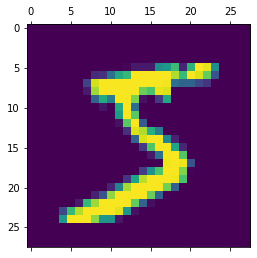

In [11]:
print(X_train.shape)
plt.matshow(X_train[0])

In [12]:
digit_data = np.concatenate((X_train, X_test))
digit_target = np.concatenate((y_train, y_test))

print(digit_data.shape, digit_target.shape)

(70000, 28, 28) (70000,)


In [13]:
digit_target+=26
digit_target.max()

35

In [14]:
final_data = np.concatenate((digit_data, letter_data))
final_target = np.concatenate((digit_target, letter_target))

print(final_data.shape, final_target.shape)

(442450, 28, 28) (442450,)


In [15]:
final_data=np.reshape(final_data, (final_data.shape[0],28, 28, 1))

In [16]:
train_data, test_data, train_target, test_target = train_test_split(final_data, final_target, test_size=0.2)

In [17]:
train_data = train_data / 255
test_data = test_data/255

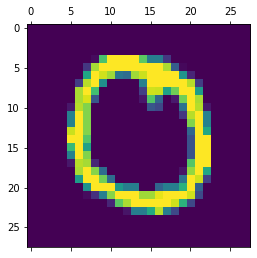

In [18]:
train_data[0]
plt.matshow(train_data[0])

In [19]:
#X_train_flattened = X_train.reshape(len(X_train),28*28)
#X_test_flattened = X_test.reshape(len(X_test),28*28)

In [20]:
#X_train_flattened[0]

In [21]:
train_data.shape

(353960, 28, 28, 1)

In [22]:
train_target.shape

(353960,)

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(36,activation = 'sigmoid')
])
model.compile(
           optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy']
)

model.fit(train_data, train_target, epochs=5)

Epoch 1/5
11062/11062 [==============================] - 46s 4ms/step - loss: 0.3630 - accuracy: 0.9020
Epoch 2/5
11062/11062 [==============================] - 40s 4ms/step - loss: 0.1848 - accuracy: 0.9485
Epoch 3/5
11062/11062 [==============================] - 40s 4ms/step - loss: 0.1536 - accuracy: 0.9563
Epoch 4/5
11062/11062 [==============================] - 44s 4ms/step - loss: 0.1359 - accuracy: 0.9613
Epoch 5/5
11062/11062 [==============================] - 41s 4ms/step - loss: 0.1240 - accuracy: 0.9641


(28, 28, 1)
(28, 28, 1)


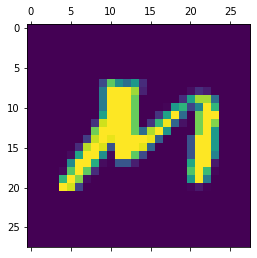

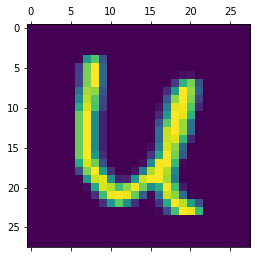

In [24]:
plt.matshow(test_data[1000])
print(test_data[0].shape)
print(train_data[0].shape)
plt.matshow(test_data[0])

In [25]:
y_predicted = model.predict(test_data)
print(test_data.shape)
y_predicted[0]

(88490, 28, 28, 1)


array([2.1075054e-10, 8.7398263e-08, 1.6544461e-03, 4.8499151e-06,
       1.2256548e-09, 5.6598933e-17, 8.2315819e-05, 5.4702640e-02,
       3.7644406e-12, 1.3545458e-05, 1.8791518e-07, 1.1737466e-02,
       2.1082406e-05, 9.5377564e-03, 2.5618076e-04, 2.0130115e-09,
       1.9869208e-04, 8.4864460e-10, 1.1964990e-07, 1.6409764e-10,
       9.9999869e-01, 2.8121471e-04, 8.2497001e-03, 2.3247531e-09,
       1.0809535e-04, 1.7031500e-09, 1.0771958e-05, 9.0394163e-09,
       8.9677755e-08, 3.2647333e-11, 5.2876323e-02, 2.1240713e-10,
       5.5722398e-06, 1.2516801e-05, 2.4681498e-08, 3.2595491e-08],
      dtype=float32)

In [26]:
np.argmax(y_predicted[0])

20

In [27]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:35]

[20,
 3,
 24,
 20,
 7,
 10,
 2,
 18,
 19,
 18,
 13,
 14,
 18,
 14,
 15,
 19,
 35,
 14,
 13,
 19,
 20,
 1,
 20,
 4,
 9,
 14,
 24,
 28,
 7,
 14,
 15,
 11,
 14,
 20,
 30]

In [28]:
model.evaluate(test_data,test_target)

2766/2766 [==============================] - 9s 3ms/step - loss: 0.1478 - accuracy: 0.9591


[0.14779232442378998, 0.9590914249420166]

In [29]:
#confusion matrix
cm = tf.math.confusion_matrix(labels = test_target, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(36, 36), dtype=int32, numpy=
array([[2648,    0,    0, ...,    1,    0,    2],
       [   5, 1597,    2, ...,    0,   12,    4],
       [   1,    4, 4541, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., 1478,    4,    9],
       [   0,    7,    0, ...,    7, 1276,   13],
       [   0,    0,    0, ...,   17,    7, 1366]])>

In [30]:
"""model = keras.Sequential([
     keras.layers.Dense(100,input_shape=(784,),activation = 'relu')
     keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
           optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)
"""

"model = keras.Sequential([\n     keras.layers.Dense(100,input_shape=(784,),activation = 'relu')\n     keras.layers.Dense(10, activation = 'sigmoid')\n])\nmodel.compile(\n           optimizer = 'adam',\n           loss = 'sparse_categorical_crossentropy',\n           metrics = ['accuracy']\n)\n\nmodel.fit(X_train_flattened, y_train, epochs=5)\n"

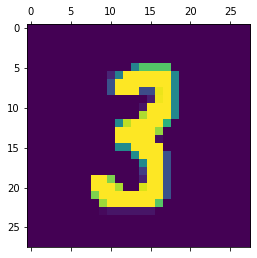

In [31]:
image = cv2.imread("7.png",0)
new_image = cv2.resize(image,(28,28))
new_image = new_image/255
new_image.shape
plt.matshow(new_image)

In [32]:
dictionary = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',0,1,2,3,4,5,6,7,8]
image_data = new_image.reshape(1,new_image.shape[0],new_image.shape[1])
predict = model.predict(image_data)
ans = predict.argsort()[0][33:36]
predict_label = []
for i in range(0, predict.shape[0]):
    predict_label.append(predict[i].argmax())
for j in ans[::-1]:
    print(dictionary[j])


3
Y
8


In [33]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


In [ ]:
import tkinter as tk
from PIL import ImageTk, Image
from tkinter import filedialog
import numpy as np
import pickle
import cv2
import tensorflow as tf
from tensorflow import keras

def load_img():
    global img, image_data
    for img_display in frame.winfo_children():
        img_display.destroy()

    image_data = filedialog.askopenfilename(initialdir='/Desktop/Project', title="Choose an image",
                                       filetypes=(("all files", "*.*"), ("png files", "*.png")))
    basewidth = 150 # Processing image for dysplaying
    img = Image.open(image_data)
    img.save('test.png')
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((basewidth, hsize), Image.ANTIALIAS)
    img = ImageTk.PhotoImage(img)
    file_name = image_data.split('/')
    panel = tk.Label(frame, text= str(file_name[len(file_name)-1]).upper()).pack()
    panel_image = tk.Label(frame, image=img).pack()


def classify():
    image = cv2.imread("test.png",0)
    new_image = cv2.resize(image,(28,28))
    new_image=new_image/255
    print(new_image.shape)
    dictionary = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']
    image_data = new_image.reshape(1,new_image.shape[0],new_image.shape[1],1)
    print(image_data.shape)
    predict = loaded_model.predict([image_data])
    predict_label = []
    for i in range(0, predict.shape[0]):
        predict_label.append(predict[i].argmax())
    ans = predict.argsort()[0][33:36]
    res=""
    print(dictionary[predict_label[0]])
    for j in ans[::-1]:
        res=res+" "+dictionary[j]
    output.config(text = res)
    

loaded_model = keras.models.load_model("model")
root = tk.Tk()
root.title('Character Recognition using NN')
root.iconbitmap('neural.ico')
root.resizable(False, False)
tit = tk.Label(root, text="Character Recognition using NN", padx=25, pady=6, font=("", 12)).pack()
canvas = tk.Canvas(root, height=500, width=500, bg='grey')
canvas.pack()
frame = tk.Frame(root, bg='white')
frame.place(relwidth=0.8, relheight=0.8, relx=0.1, rely=0.1)
chose_image = tk.Button(root, text='Choose Image',
                        padx=35, pady=10,
                        fg="white", bg="grey", activeforeground = "black" , command=load_img)
chose_image.pack(side=tk.LEFT)
output=tk.Label(root, text = "", font=("", 12))

class_image = tk.Button(root, text='Recognize Image',
                        padx=35, pady=10,
                        fg="white", bg="grey", command=classify , activebackground = "green")
class_image.pack(side=tk.RIGHT)
output.pack()


root.mainloop()